# Análise do Impacto da Música na Saúde Mental

Este projeto tem como objetivo analisar os dados de uma pesquisa que investiga a relação entre os hábitos de escuta musical e a saúde mental. O foco é explorar como diferentes preferências musicais, frequências de escuta e características pessoais se correlacionam com condições de saúde mental autodeclaradas, como ansiedade, depressão, insônia e TOC (Transtorno Obsessivo-Compulsivo).

---
## Importando Bibliotecas e Lendo os Dados

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import func
import numpy as np

In [42]:
df = pd.read_csv("mxmh_survey_results.csv")

In [43]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


---
## Alterando os Tipos dos Dados

Alteramos os tipos dos dados que estavam classificados como "object", não sendo possível realizar nossas análises por conta disso. Usamos uma função criada por nós no arquivo "func.py" deste projeto.

In [44]:
func.alterar_type(df)

---
## Traduzindo Colunas

Para facilitar o trabalho, vamos traduzir as colunas do dataset.

In [45]:
colunas_traduzidas = [
    "data_e_hora_envio", "idade", "servico_de_streaming_principal",
    "horas_por_dia", "enquanto_trabalha",
    "instrumentalista", "compositor", "genero_fav",
    "exploratorio", "em_outros_idiomas", "bpm",
    "frequencia_musica_classica", "frequencia_country",
    "frequencia_edm", "frequencia_folk", "frequencia_gospel",
    "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop",
    "frequencia_latin", "frequencia_lofi", "frequencia_metal",
    "frequencia_pop", "frequencia_rb", "frequencia_rap",
    "frequencia_rock", "frequencia_musica_videogame",
    "ansiedade", "depressao", "insonia", "toc",
    "efeitos_na_saude_mental", "permissoes"
]

legenda = """
0 - Nunca
1 - Raramente
2 - Algumas vezes
3 - Bem frequentemente """

In [46]:
df.columns = colunas_traduzidas
df

,data_e_hora_envio,idade,servico_de_streaming_principal,horas_por_dia,enquanto_trabalha,instrumentalista,compositor,genero_fav,exploratorio,em_outros_idiomas,...,frequencia_rb,frequencia_rap,frequencia_rock,frequencia_musica_videogame,ansiedade,depressao,insonia,toc,efeitos_na_saude_mental,permissoes
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1.0,1.0,...,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1.0,0.0,...,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0.0,1.0,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1.0,0.0,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,1.0,1.0,0.0,Rock,1.0,1.0,...,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,1.0,1.0,0.0,Pop,1.0,1.0,...,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,1.0,0.0,1.0,Rap,1.0,0.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,1.0,1.0,0.0,Classical,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,Improve,I understand.


---
## Selecionando Apenas Colunas Numéricas

In [47]:
lista_colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
print("Lista de colunas numéricas")
print(lista_colunas_numericas)

Lista de colunas numéricas
['idade', 'horas_por_dia', 'enquanto_trabalha', 'instrumentalista', 'compositor', 'exploratorio', 'em_outros_idiomas', 'bpm', 'frequencia_musica_classica', 'frequencia_country', 'frequencia_edm', 'frequencia_folk', 'frequencia_gospel', 'frequencia_hip_hop', 'frequencia_jazz', 'frequencia_kpop', 'frequencia_latin', 'frequencia_lofi', 'frequencia_metal', 'frequencia_pop', 'frequencia_rb', 'frequencia_rap', 'frequencia_rock', 'frequencia_musica_videogame', 'ansiedade', 'depressao', 'insonia', 'toc']


---
## Calculando Medidas de Centralidade e Dispersão

In [48]:
medidas_dispersao = {}

mediana_bpm = df["bpm"].median()
df.loc[df["bpm"] > 300, "bpm"] = mediana_bpm

for column in lista_colunas_numericas:
    medidas_dispersao[column] = {
        'Media': df[column].mean(),
        'Mediana': df[column].median(),
        'Moda': df[column].mode()[0],
        'Desvio Padrão': df[column].std(),
        'Variância': df[column].var(),
        'Amplitude': df[column].max() - df[column].min()
    }

# Convertendo para DataFrame
medidas_df = pd.DataFrame(medidas_dispersao).T
medidas_df.columns = ['Media', 'Mediana', 'Moda', 'Desvio Padrão', 'Variância', 'Amplitude']
medidas_df

,Media,Mediana,Moda,Desvio Padrão,Variância,Amplitude
idade,25.206803,21.0,18.0,12.054970,145.322297,79.0
horas_por_dia,3.572758,3.0,2.0,3.028199,9.169988,24.0
enquanto_trabalha,0.789905,1.0,1.0,0.407654,0.166182,1.0
instrumentalista,0.321038,0.0,0.0,0.467195,0.218271,1.0
compositor,0.171429,0.0,0.0,0.377140,0.142234,1.0
exploratorio,0.713315,1.0,1.0,0.452521,0.204775,1.0
em_outros_idiomas,0.551913,1.0,1.0,0.497638,0.247643,1.0
bpm,122.616852,120.0,120.0,33.852120,1145.966021,220.0
frequencia_musica_classica,1.335598,1.0,1.0,0.988442,0.977017,3.0
frequencia_country,0.817935,1.0,0.0,0.922584,0.851161,3.0


Como podemos ver, a média dos valores estavam muito fora de formatação, por isso precisamos formatar e ajusta-las.

In [49]:
# Arredondar os valores para duas casas decimais
df_medidas_centralidade = medidas_df.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

# Exibir o DataFrame formatado
display(df_medidas_centralidade)

,Media,Mediana,Moda,Desvio Padrão,Variância,Amplitude
idade,25.21,21.00,18.00,12.05,145.32,79.00
horas_por_dia,3.57,3.00,2.00,3.03,9.17,24.00
enquanto_trabalha,0.79,1.00,1.00,0.41,0.17,1.00
instrumentalista,0.32,0.00,0.00,0.47,0.22,1.00
compositor,0.17,0.00,0.00,0.38,0.14,1.00
exploratorio,0.71,1.00,1.00,0.45,0.20,1.00
em_outros_idiomas,0.55,1.00,1.00,0.50,0.25,1.00
bpm,122.62,120.00,120.00,33.85,"1,145.97",220.00
frequencia_musica_classica,1.34,1.00,1.00,0.99,0.98,3.00
frequencia_country,0.82,1.00,0.00,0.92,0.85,3.00


### Exibindo os Boxplots:


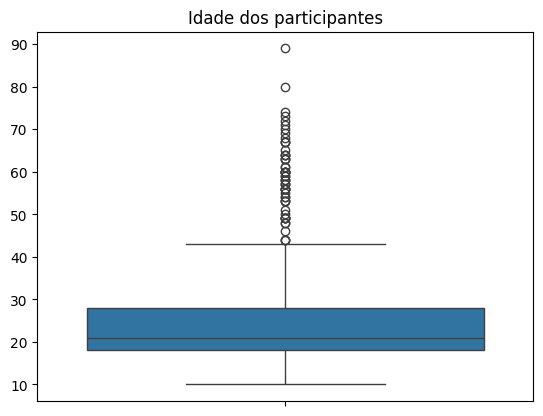

In [50]:
func.exibir_boxplot(dataset = df, coluna = "idade", orientacao = "v", titulo = "Idade dos participantes")

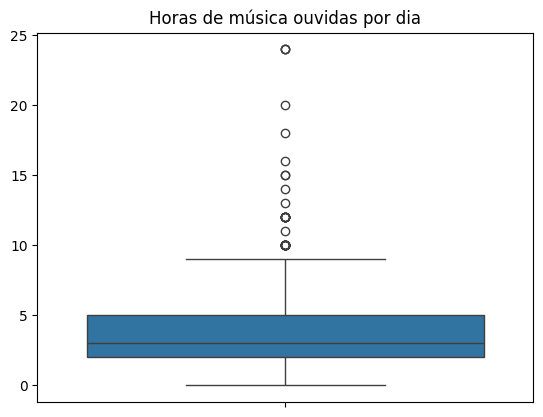

In [51]:
func.exibir_boxplot(df, "horas_por_dia", "v", "Horas de música ouvidas por dia")

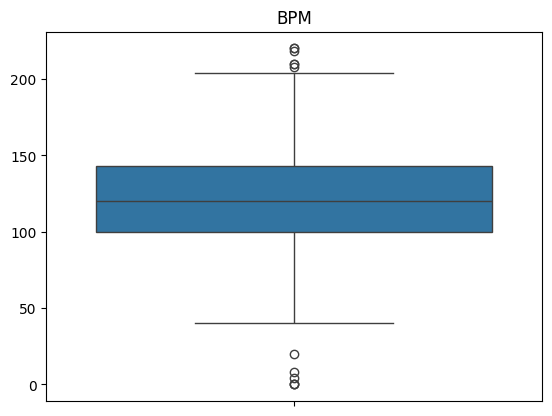

In [52]:
func.exibir_boxplot(df, "bpm", "v", "BPM")

### Exibindo vários boxplots de mesma categoria:

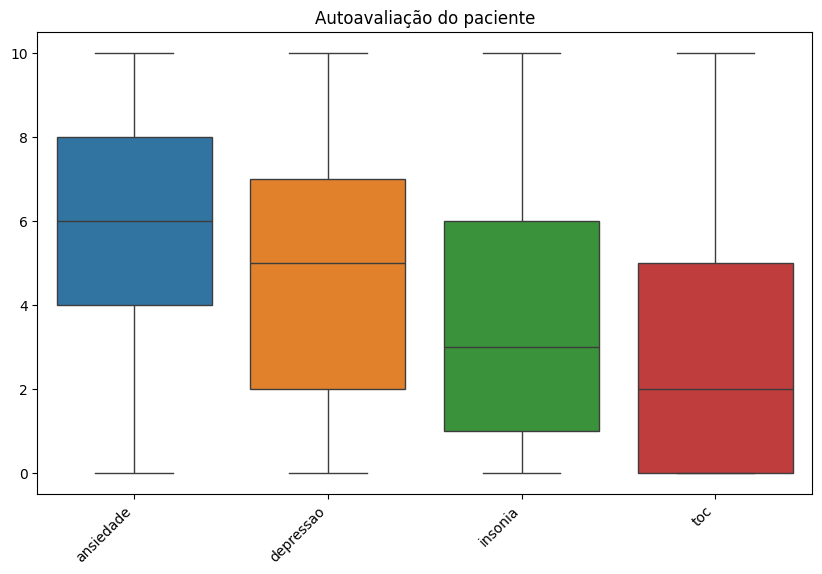

In [53]:
func.boxplot_de_varias(df, "Autoavaliação do paciente", 10, 6, "","ansiedade", "depressao", "insonia", "toc")

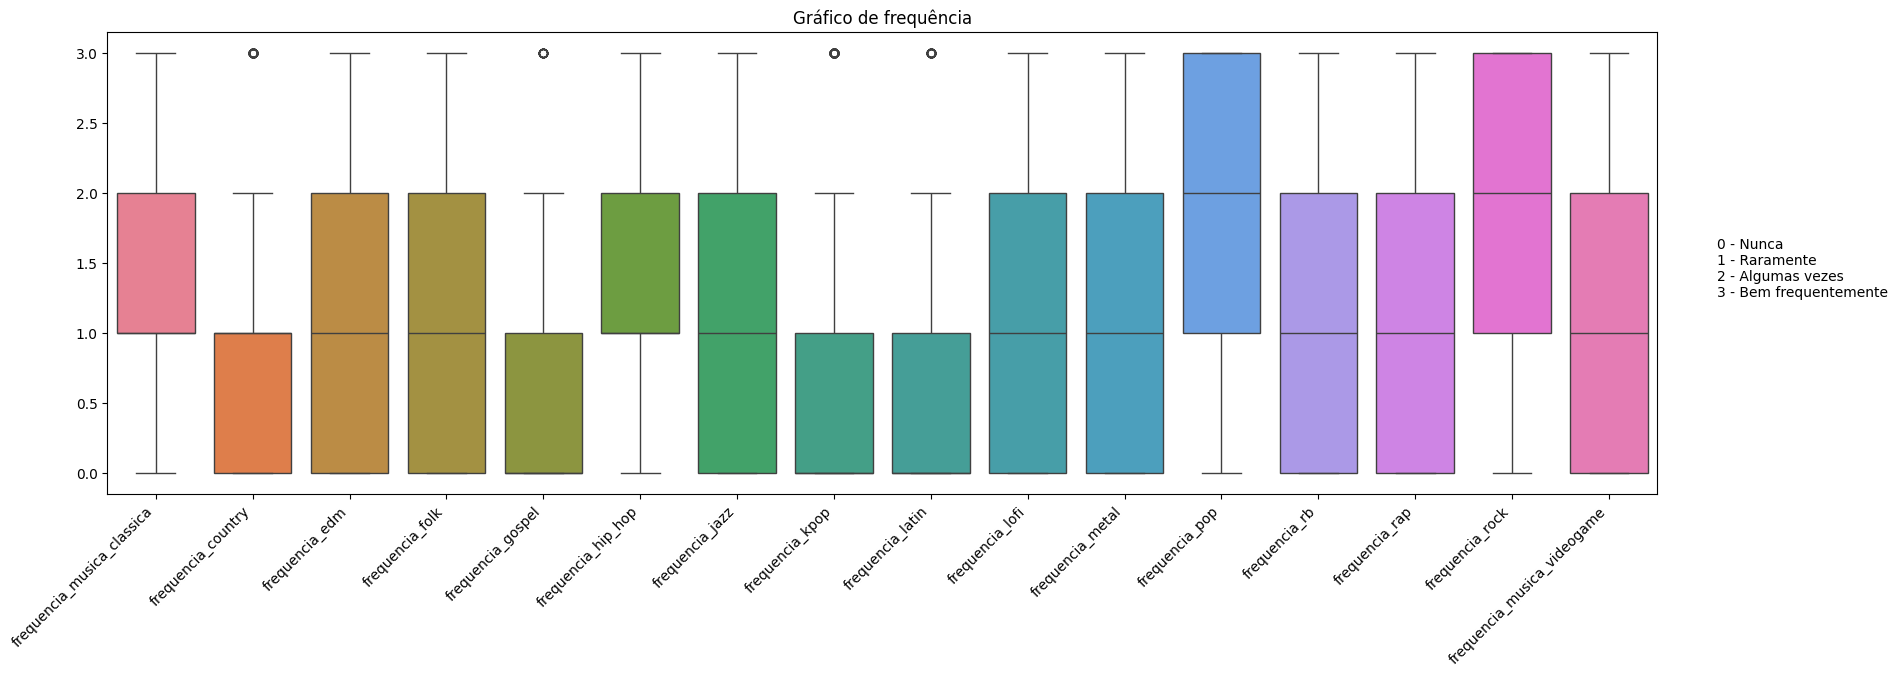

In [54]:
func.boxplot_de_varias(df, "Gráfico de frequência", 20, 6, legenda, "frequencia_musica_classica", "frequencia_country", "frequencia_edm", "frequencia_folk", "frequencia_gospel", "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop","frequencia_latin", "frequencia_lofi", "frequencia_metal", "frequencia_pop", "frequencia_rb", "frequencia_rap", "frequencia_rock", "frequencia_musica_videogame")

### Mostrando correlações:

In [75]:
matriz_correlacao = df[lista_colunas_numericas].corr()
print(matriz_correlacao)

                                idade  horas_por_dia  enquanto_trabalha  \
idade                        1.000000      -0.044638          -0.080591   
horas_por_dia               -0.044638       1.000000           0.282035   
enquanto_trabalha           -0.080591       0.282035           1.000000   
instrumentalista            -0.130257      -0.022053           0.083186   
compositor                  -0.035002       0.133454           0.048571   
exploratorio                -0.178837       0.141783           0.139844   
em_outros_idiomas           -0.138228       0.088773           0.120077   
bpm                         -0.030395       0.025454          -0.014789   
frequencia_musica_classica   0.100090      -0.028237           0.053089   
frequencia_country           0.121563       0.037474          -0.014301   
frequencia_edm              -0.101486       0.128169           0.135907   
frequencia_folk              0.114419       0.083055           0.042767   
frequencia_gospel        

In [56]:
#Para melhor visualização dos dados.
df['minutos_por_dia'] = df['horas_por_dia'] * 60 

In [57]:
#tratando alguns valores que estão fora do 'normal'.

mediana_minutos_dia = df['minutos_por_dia'].median()

df.loc[df['minutos_por_dia'] > 900, 'minutos_por_dia'] = mediana_minutos_dia	

print(df['minutos_por_dia'].describe()) # Exibe um resumo da coluna 'minutos_por_dia'



count    736.000000
mean     205.561141
std      153.996701
min        0.000000
25%      120.000000
50%      180.000000
75%      240.000000
max      900.000000
Name: minutos_por_dia, dtype: float64


<Axes: xlabel='idade', ylabel='minutos_por_dia'>

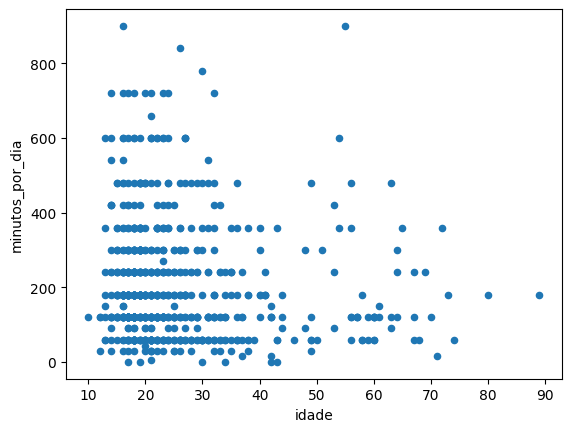

In [59]:
df.plot.scatter(x= 'idade', y = 'minutos_por_dia')

<Axes: xlabel='idade', ylabel='ansiedade'>

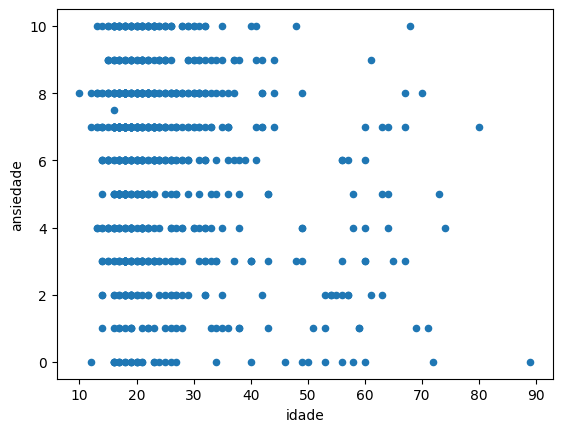

In [60]:
df.plot.scatter(x='idade', y='ansiedade')

<Axes: xlabel='bpm', ylabel='idade'>

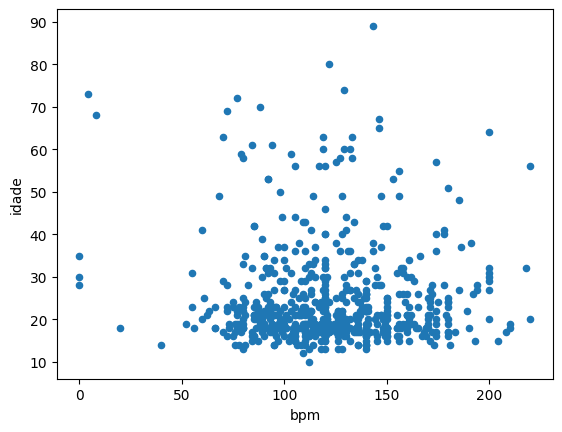

In [66]:
df.plot.scatter(x= 'bpm', y = 'idade')

<Axes: xlabel='bpm', ylabel='minutos_por_dia'>

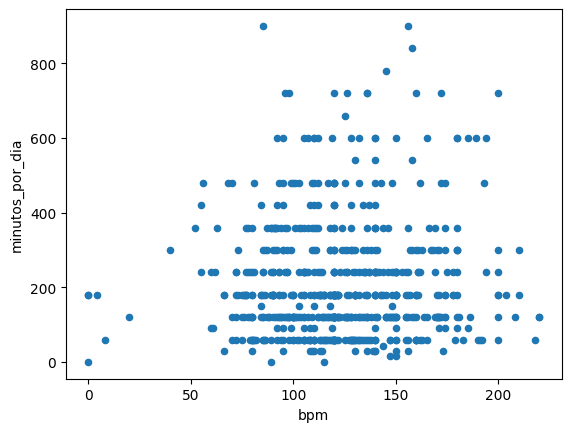

In [62]:
df.plot.scatter(x= 'bpm', y= 'minutos_por_dia')

<Axes: xlabel='ansiedade', ylabel='frequencia_musica_classica'>

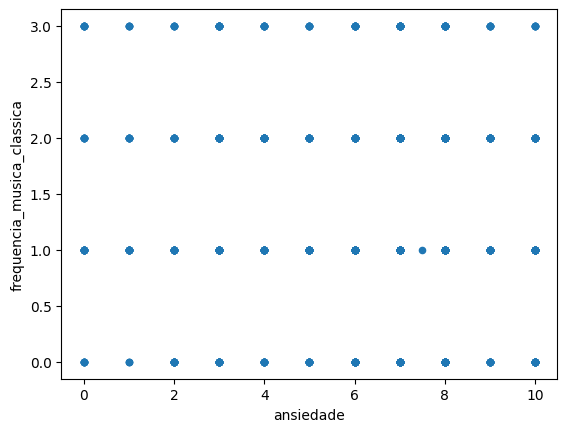

In [63]:
df.plot.scatter(x= 'ansiedade', y= 'frequencia_musica_classica')

### Histograma:

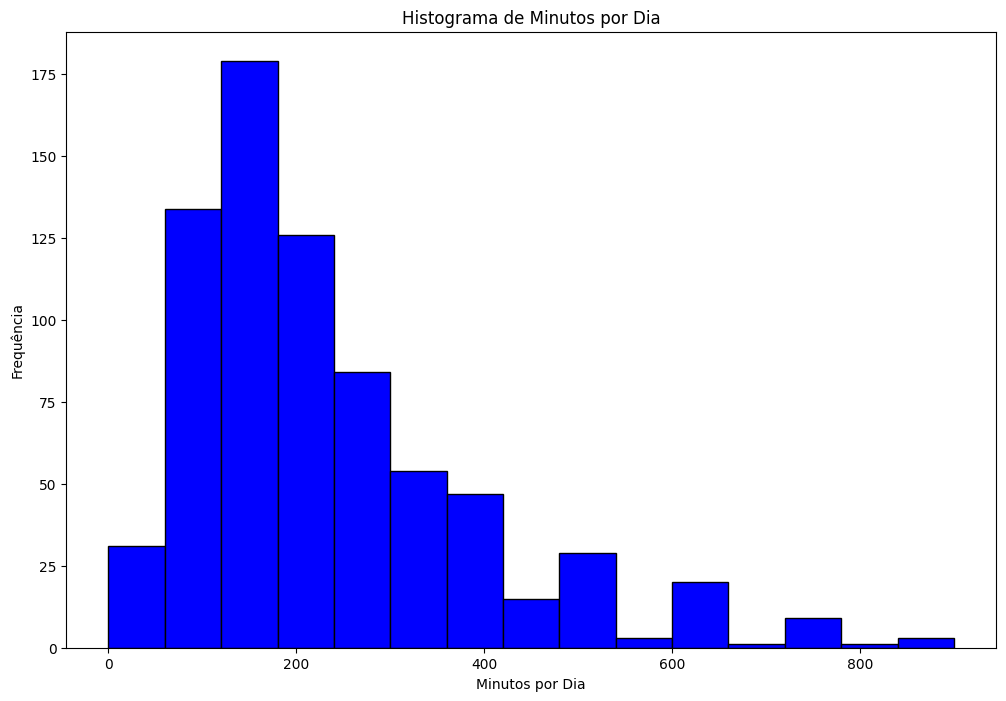

In [65]:
#Histograma de quantos minutso por dia as pessoas ouvem música

plt.figure(figsize=(12, 8))  # Define o tamanho da figura (largura, altura)
plt.hist(df['minutos_por_dia'], bins=15, color='blue',edgecolor='black')

# Adiciona título e rótulos aos eixos
plt.title('Histograma de Minutos por Dia')
plt.xlabel('Minutos por Dia')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

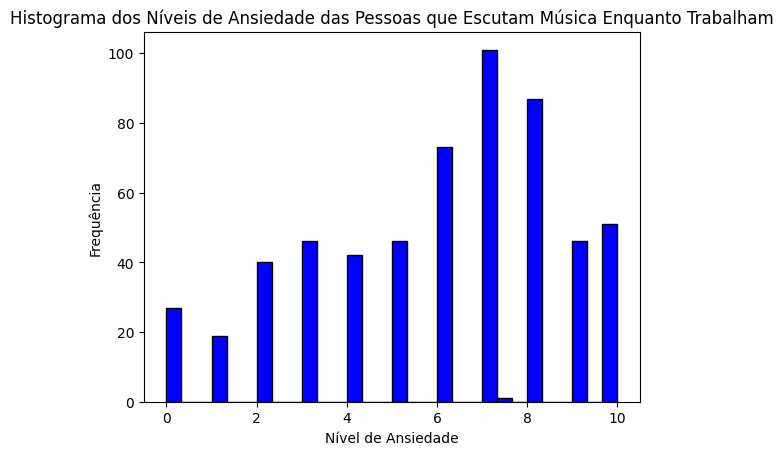

In [72]:
#Histograma das pessoas que escutam música enquanto trabalham e seus níveis de ansiedade.

df_musica_trabalho = df[df['enquanto_trabalha'] == 1]   #Filtra as pessoas que escutam música enquanto trabalham


plt.hist(df_musica_trabalho['ansiedade'], bins=30, color='blue', edgecolor='black')
plt.figure(figsize=(12, 8))  

plt.title('Histograma dos Níveis de Ansiedade das Pessoas que Escutam Música Enquanto Trabalham')
plt.xlabel('Nível de Ansiedade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()